In [34]:
from shape_utils.pyhks import trimesh, hks
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors, distance_WKS, saveWKSColors
from shape_utils.functional_maps import calculate_functional_maps, compute_shape_difference
from shape_utils.pyFM_pdbe import functional 

import os
import seaborn as sns
from matplotlib import pyplot as plt

file_mesh1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/test_WKS/EDTSurf_Shape_analysis/pdb6mka.off'
file_mesh2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/test_WKS/EDTSurf_Shape_analysis/pdb6mkf.off'
mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)
model = functional.FunctionalMapping(mesh1,mesh2) 

#parameters functional maps
neigvecs = 200
ndescr = 100
step = 1
output = './example_data/'
descr = 'HKS'
landmarks = None

descr1,descr2,paramlist = calculate_descriptors(model,neigvecs,ndescr,step,landmarks,output,descr)
D_area,D_conformal,p2p_21 = calculate_functional_maps(model,n_cpus=8,refine= None)






Computing Laplacian spectrum
Computing 200 eigenvectors
	Done in 34.47 s
Computing 200 eigenvectors
	Done in 34.65 s

Computing descriptors


python(21723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21726) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(21730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


	Normalizing descriptors

	100 out of 100 possible descriptors kept
cpus used 8
Computing commutativity operators
	Scaling LBO commutativity weight by 1.9e-10

Optimization :
	120 Ev on source - 120 Ev on Target
	Using 100 Descriptors
	Hyperparameters :
		Descriptors preservation :1.0e+00
		Descriptors commutativity :1.0e-01
		Laplacian commutativity :1.0e-02
		Orientation preservation :0.0e+00

	Task : CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH, funcall : 163, nit : 151, warnflag : 0
	Done in 16.94 seconds
 Calculating shape distance matrix


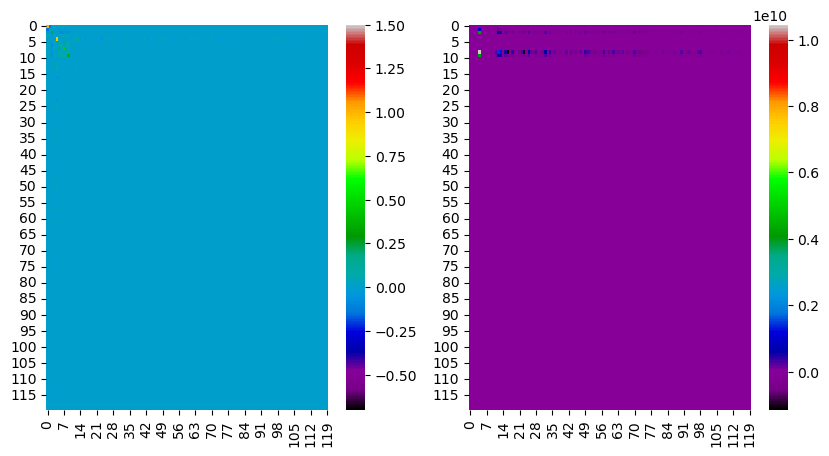

In [35]:
import meshplot as mp
import numpy as np
def plot_mesh(myMesh,cmap=None):
    mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist, myMesh1.facelist, c=cmap1, s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2, s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap

cmap1 = visu(mesh1.vertlist); cmap2 = cmap1[p2p_21]
double_plot(mesh1,mesh2,cmap1,cmap2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

sns.heatmap(D_area,vmin=-0.7,vmax=1.5,ax=ax1,cmap ='nipy_spectral')
sns.heatmap(D_conformal, ax=ax2, cmap='nipy_spectral')

plt.savefig("./matrix_whitespace.png", dpi=96)

In [32]:
file_mesh1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/test_WKS/EDTSurf_Shape_analysis/pdb6mka.off'
file_mesh2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/mono_protein_conformers/test_WKS/EDTSurf_Shape_analysis/pdb6mkj.off'
mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)
model = functional.FunctionalMapping(mesh1,mesh2) 

#parameters functional maps
neigvecs = 200
ndescr = 100
step = 1
output = './example_data/'
descr = 'HKS'
landmarks = None

descr1,descr2,paramlist = calculate_descriptors(model,neigvecs,ndescr,step,landmarks,output,descr)
D_area,D_conformal,p2p_21 = calculate_functional_maps(model,n_cpus=8,refine= None)



Computing Laplacian spectrum
Computing 200 eigenvectors
	Done in 32.37 s
Computing 200 eigenvectors
	Done in 31.71 s

Computing descriptors


python(20852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20855) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20857) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(20859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Finished analysis of descriptors in 100.09805369377136 seconds
	Normalizing descriptors

	100 out of 100 possible descriptors kept
cpus used 8
Computing commutativity operators
	Scaling LBO commutativity weight by 1.9e-10

Optimization :
	120 Ev on source - 120 Ev on Target
	Using 100 Descriptors
	Hyperparameters :
		Descriptors preservation :1.0e+00
		Descriptors commutativity :1.0e-01
		Laplacian commutativity :1.0e-02
		Orientation preservation :0.0e+00

	Task : CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH, funcall : 372, nit : 357, warnflag : 0
	Done in 40.39 seconds
 Calculating shape distance matrix


<AxesSubplot:>

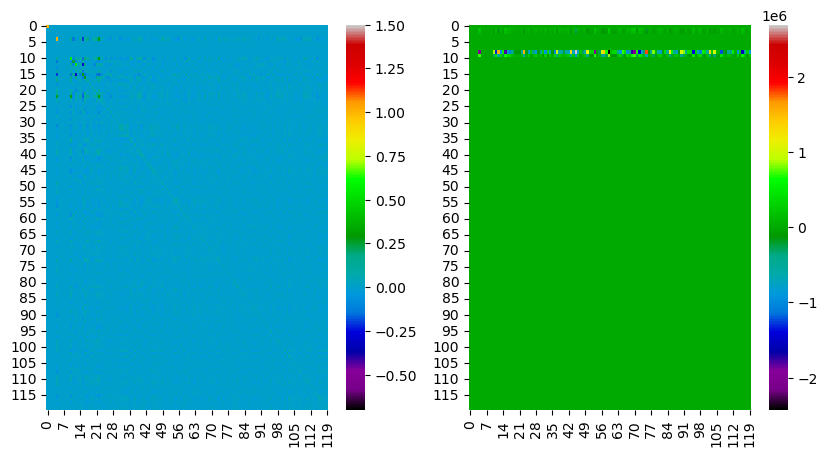

In [33]:
import meshplot as mp
import numpy as np
def plot_mesh(myMesh,cmap=None):
    mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist, myMesh1.facelist, c=cmap1, s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2, s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap

cmap1 = visu(mesh1.vertlist); cmap2 = cmap1[p2p_21]
double_plot(mesh1,mesh2,cmap1,cmap2)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

sns.heatmap(D_area,vmin=-0.7,vmax=1.5,ax=ax1,cmap ='nipy_spectral')
sns.heatmap(D_conformal, ax=ax2, cmap='nipy_spectral')